In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
rec1 = pd.read_csv('rec1.csv')
rec2 = pd.read_csv('rec2.csv')
rec3 = pd.read_csv('rec3.csv')
rec4 = pd.read_csv('rec4.csv')
rec5 = pd.read_csv('rec5.csv')

In [3]:
rec1 = rec1.drop(columns = ['Unnamed: 0'])
rec2 = rec2.drop(columns = ['Unnamed: 0'])
rec3 = rec3.drop(columns = ['Unnamed: 0'])
rec4 = rec4.drop(columns = ['Unnamed: 0'])
rec5 = rec5.drop(columns = ['Unnamed: 0'])

# Trial 1: Rec1 without PCA 

In [71]:
y = rec1['Status']
X = rec1.iloc[:,:-9]

In [72]:
X.shape

(90, 256)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [7]:
log_reg = LogisticRegression(random_state=0)
clf = log_reg.fit(X_train, y_train)
# clf.predict(X_test)
clf.score(X_test, y_test)

1.0

100% accuracy

In [10]:
# calculate true positive rate and false positive rate
y_pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

In [19]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

1.0

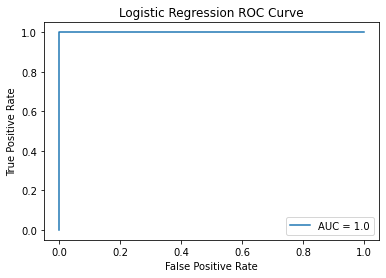

In [25]:
# create ROC curve - determines best cutoff value for predicting new observations
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

Logistic Regression classifies the data into positive and negative emotions super well. The accuracy score and AUC are both 1.0. Since AUC, area under the curve, reflects how much of the plot is located under the curve, a value of 1.0 further supports how well it classifies.

### Random Forest Classifier

In [35]:
# Next step: try to use grid search CV on this
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8333333333333334

83% accuracy

In [36]:
# calculate true positive rate and false positive rate
y_pred_prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

1.0

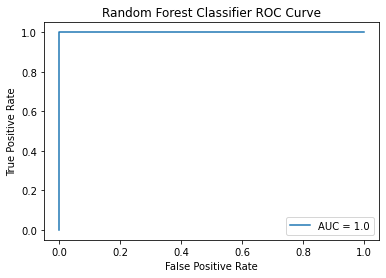

In [34]:
# create ROC curve - determines best cutoff value for predicting new observations
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend()
plt.show()

Random Forest Clasifier performed just as well as Logistic Regression - both classify the data into positive and negative emotions super well as the accuracy scores and AUCs are both 1.0. 

### Linear Discriminiant Analysis

In [68]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

100% accuracy

In [69]:
# calculate true positive rate and false positive rate
y_pred_prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

1.0

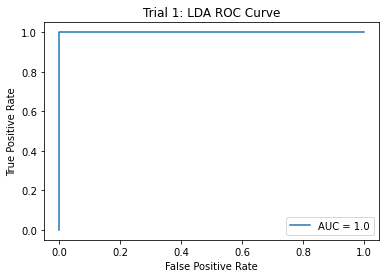

In [70]:
# create ROC curve - determines best cutoff value for predicting new observations
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Trial 1: LDA ROC Curve')
plt.legend()
plt.show()

Since LDA also scored a 1.0 with 100% accuracy, all classifiers in Trial 1 perform super well on the first recording data.

## Trial 2: PCA only Rec1

In [37]:
sc = StandardScaler()
X_pca = sc.fit_transform(X)

pca = PCA(n_components = 85)
X_pca = pca.fit_transform(X)

Apply PCA on the first recording to scale down the dimension by reducing the number of columns to 1/3 the number of channels (256).

In [38]:
X_pca.shape

(90, 85)

In [39]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)

### Logistic Regression 

In [40]:
clf = LogisticRegression(random_state=0).fit(X_train_pca, y_train_pca)
# clf.predict(X_test)
clf.score(X_test_pca, y_test_pca)

1.0

Logistic Regression still classifies with 100% accuracy even with PCA reducing the data to the 85 most significant channels.

### Random Forest Classifier

In [61]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)

0.7222222222222222

72% accuracy

In [62]:
# calculate true positive rate and false positive rate
y_pred_prob = clf.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_pca, y_pred_prob)

auc = metrics.roc_auc_score(y_test_pca, y_pred_prob)
auc

1.0

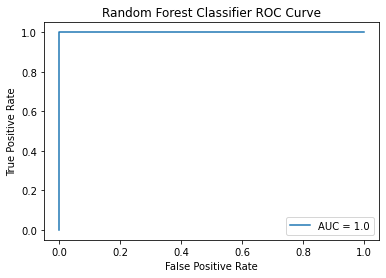

In [63]:
# create ROC curve - determines best cutoff value for predicting new observations
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend()
plt.show()

### Linear Discriminiant Analysis


In [65]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)

0.4444444444444444

44% accuracy

In [66]:
# calculate true positive rate and false positive rate
y_pred_prob = clf.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_pca, y_pred_prob)

auc = metrics.roc_auc_score(y_test_pca, y_pred_prob)
auc

0.3230769230769231

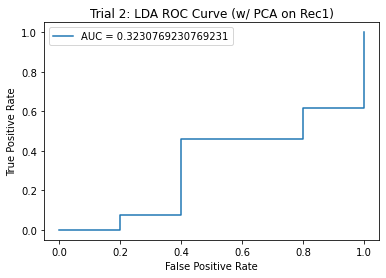

In [67]:
# create ROC curve - determines best cutoff value for predicting new observations
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Trial 2: LDA ROC Curve (w/ PCA on Rec1)')
plt.legend()
plt.show()

LDA classifies positive and negative emotions poorly on the first recording after PCA reduced the dimensions to the top 33% most relevant channels. This is reflected by an AUC score of 0.32 as the ROC curve is far from the top left corner and could be interpreted as classifying randomly if not much worse than the chance of flipping a coin.

## Trial 3: Train on Multiple Rec
### combine first and then apply pca

In [116]:
combined = rec1.append(rec2).append(rec3).append(rec4).append(rec5)

In [119]:
combined.shape

(470, 265)

In [120]:
X_combined = combined.iloc[:,:-9]
y_combined = combined['Status']

In [121]:
y_combined.value_counts()

 1    348
-1    122
Name: Status, dtype: int64

In [122]:
#pca
sc = StandardScaler()
X_combined = sc.fit_transform(X_combined)

pca = PCA(n_components = 85)
X_combined = pca.fit_transform(X_combined)

In [123]:
X_combined.shape # after pca

(470, 85)

In [124]:
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_combined, y_combined, test_size = 0.2, random_state = 0)

### Logistic Regression

In [125]:
log = LogisticRegression(random_state=0).fit(X_train_com, y_train_com)
# clf.predict(X_test)
log.score(X_test_com, y_test_com)

0.7978723404255319

### Random Forest Classifier

In [126]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train_com, y_train_com)
rfc.score(X_test_com, y_test_com)

0.7553191489361702

### Linear Discriminiant Analysis

In [127]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_com, y_train_com)
lda.score(X_test_com, y_test_com)

0.7978723404255319

# Trial 4: Using Grid Search CV to find the best parameter

### Logistic Regression

In [140]:
params = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
           'C': [100, 10, 1.0, 0.1, 0.01]
          }]
rfc_gs = GridSearchCV(LogisticRegression(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
rfc_gs.fit(X_train_com, y_train_com)
rfc_gs.best_params_

{'C': 100, 'solver': 'newton-cg'}

In [141]:
log = LogisticRegression(solver = 'newton-cg', C = 100).fit(X_train_com, y_train_com)
log.score(X_test_com, y_test_com)

0.8936170212765957

### Random Forest Classifier

In [132]:
params = [{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
         }]
rfc_gs = GridSearchCV(RandomForestClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
rfc_gs.fit(X_train_com, y_train_com)
rfc_gs.best_params_

{'max_depth': 10}

In [131]:
rfc = RandomForestClassifier(max_depth=7, random_state=0)
rfc.fit(X_train_com, y_train_com)
rfc.score(X_test_com, y_test_com)

0.9574468085106383

### Linear Discriminiant Analysis

In [137]:
params = [{'solver': ['svd', 'lsqr', 'eigen'],
           'n_components': [None, 1, 2, 3, 4, 5]
         }]
rfc_gs = GridSearchCV(LinearDiscriminantAnalysis(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
rfc_gs.fit(X_train_com, y_train_com)
rfc_gs.best_params_

{'n_components': None, 'solver': 'svd'}

In [138]:
lda = LinearDiscriminantAnalysis(n_components =  None, solver = 'svd')
lda.fit(X_train_com, y_train_com)
lda.score(X_test_com, y_test_com)

0.7978723404255319